In [84]:
# install needed packages/libraries
# ! pip install pandas numpy matplotlib seaborn scikit-learn scipy

In [50]:
#import the installed libraries/packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle

In [537]:
#prepare req.txr file 
! pip freeze > requirements.txt

In [51]:
#read the data
data = pd.read_csv(r"D:\CAPSTONE\COPPER\DATA\data.csv")

C:\Users\nandh\AppData\Local\Temp\ipykernel_12528\1080927524.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"D:\CAPSTONE\COPPER\DATA\data.csv")


In [53]:
# make copy of the org data just in case
df = data.copy()

In [54]:
len(df) #total no.of rows in df 

181673

In [55]:
# head check
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [56]:
df.shape #no of rows and cols in a df

(181673, 14)

#### Index May not be useful

In [57]:
#reset the index
df = df.reset_index(drop=True)

In [58]:
#check duplicates | if any remove them
df.duplicated().sum()

0

In [59]:
# column check
print(df.columns)
print(len(df.columns))

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')
14


In [60]:
#data types check
df.dtypes.sort_values()

product_ref        int64
item_date        float64
customer         float64
country          float64
application      float64
thickness        float64
width            float64
delivery date    float64
selling_price    float64
id                object
quantity tons     object
status            object
item type         object
material_ref      object
dtype: object

In [61]:
# category type - country / item type / application / customer / product_ref / status

In [62]:
df.nunique().sort_values(ascending=True) # check how many unique values in each column

item type             7
status                9
country              17
delivery date        28
application          30
product_ref          33
item_date           252
thickness           594
customer           1169
width              1386
selling_price      9795
material_ref      16563
id               181671
quantity tons    181673
dtype: int64

### TREATING THE DTYPE PROBLEMS

In [63]:
df['country'] = df['country'].astype('category')
df['item type'] = df['item type'].astype('category')
df['application'] = df['application'].astype('category')
df['customer'] = df['customer'].astype('object')
df["product_ref"] = df["product_ref"].astype('category')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce')
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce')
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df["status"] = df["status"].astype('category')

 after changing the dtype

In [64]:
df.dtypes

id                       object
item_date        datetime64[ns]
quantity tons           float64
customer                 object
country                category
status                 category
item type              category
application            category
thickness               float64
width                   float64
material_ref             object
product_ref            category
delivery date    datetime64[ns]
selling_price           float64
dtype: object

#### Analyze th Date Type Columns By using Line Plots to check if there is any trend/seasonality that affects the selling price(Target Variable for Regression Model)

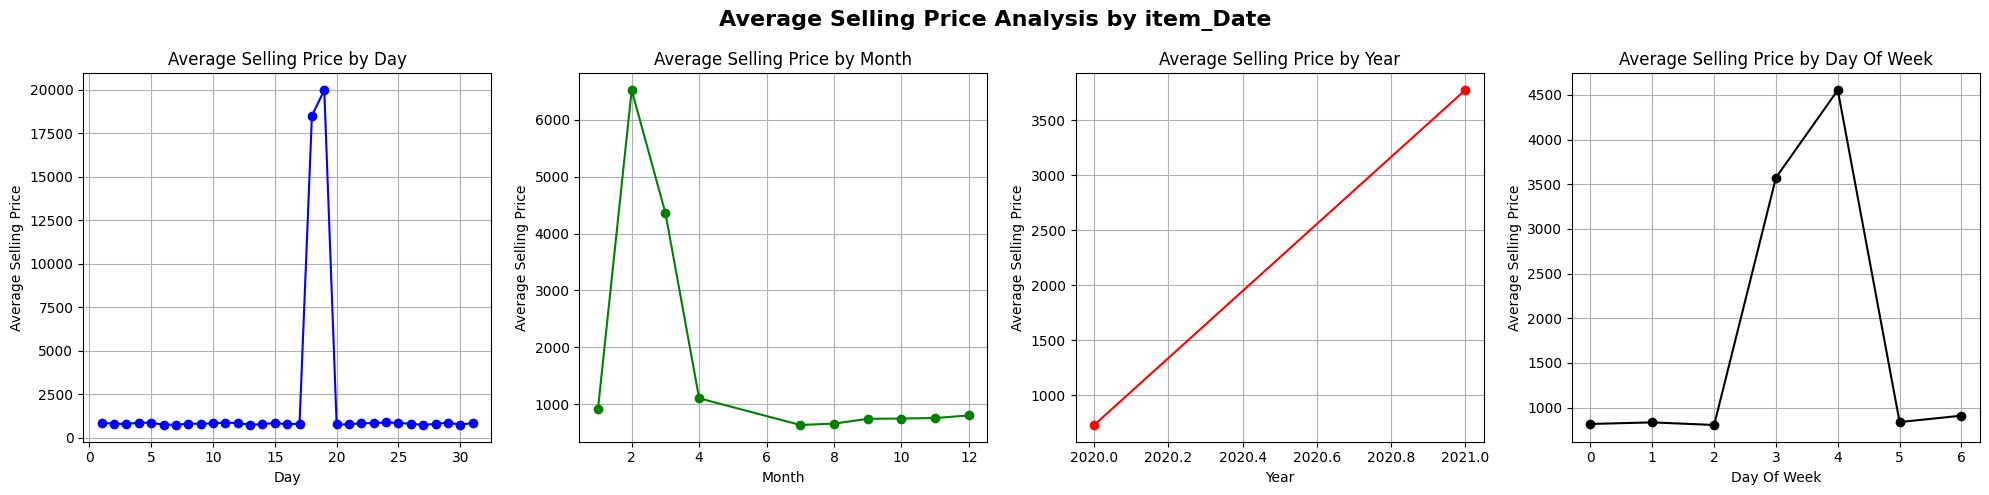

In [65]:
# Create subplots for item_date(probably ordering date) column
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
fig.suptitle('Average Selling Price Analysis by item_Date', fontsize=16, fontweight='bold')
# Daily average plot
day = df.groupby(df['item_date'].dt.day)['selling_price'].mean()
axes[0].plot(day, marker='o', linestyle='-', color='b')
axes[0].set_title('Average Selling Price by Day')
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Average Selling Price')
axes[0].grid(True)
# Monthly average plot
mon = df.groupby(df['item_date'].dt.month)['selling_price'].mean()
axes[1].plot(mon, marker='o', linestyle='-', color='g')
axes[1].set_title('Average Selling Price by Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Average Selling Price')
axes[1].grid(True)
# Yearly average plot
year = df.groupby(df['item_date'].dt.year)['selling_price'].mean()
axes[2].plot(year, marker='o', linestyle='-', color='r')
axes[2].set_title('Average Selling Price by Year')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Average Selling Price')
axes[2].grid(True)
# Day Of Week average plot
day = df.groupby(df['item_date'].dt.dayofweek)['selling_price'].mean()
axes[3].plot(day, marker='o', linestyle='-', color='black')
axes[3].set_title('Average Selling Price by Day Of Week')
axes[3].set_xlabel('Day Of Week')
axes[3].set_ylabel('Average Selling Price')
axes[3].grid(True)
# Adjust layout
plt.tight_layout()
# Show plot
plt.show()

In [66]:
df = df.sort_values(by='item_date')

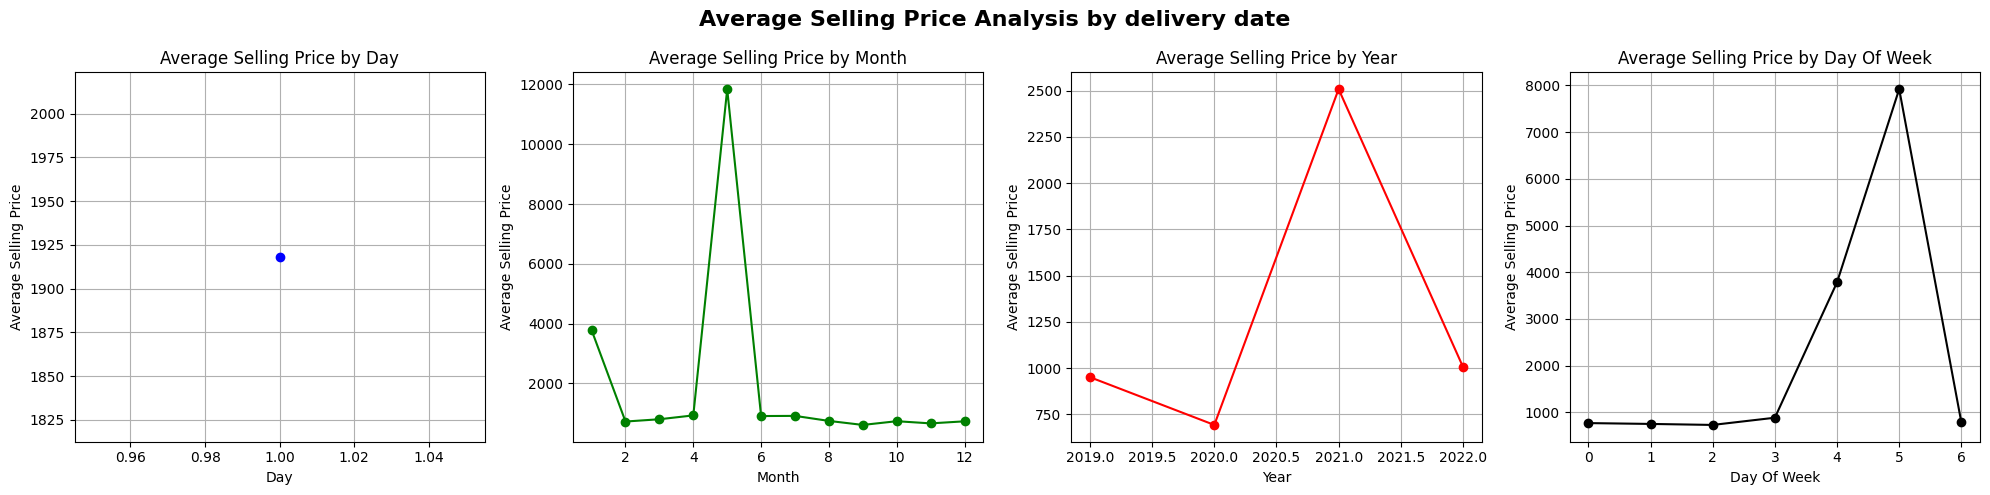

In [67]:
# Create subplots - delivery date column
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
# Set overall title for the figure
fig.suptitle('Average Selling Price Analysis by delivery date', fontsize=16, fontweight='bold')
# Daily average plot
day = df.groupby(df['delivery date'].dt.day)['selling_price'].mean()
axes[0].plot(day, marker='o', linestyle='-', color='b')
axes[0].set_title('Average Selling Price by Day')
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Average Selling Price')
axes[0].grid(True)
# Monthly average plot
mon = df.groupby(df['delivery date'].dt.month)['selling_price'].mean()
axes[1].plot(mon, marker='o', linestyle='-', color='g')
axes[1].set_title('Average Selling Price by Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Average Selling Price')
axes[1].grid(True)
# Yearly average plot
year = df.groupby(df['delivery date'].dt.year)['selling_price'].mean()
axes[2].plot(year, marker='o', linestyle='-', color='r')
axes[2].set_title('Average Selling Price by Year')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Average Selling Price')
axes[2].grid(True)
# Day Of Week average plot
day = df.groupby(df['delivery date'].dt.dayofweek)['selling_price'].mean()
axes[3].plot(day, marker='o', linestyle='-', color='black')
axes[3].set_title('Average Selling Price by Day Of Week')
axes[3].set_xlabel('Day Of Week')
axes[3].set_ylabel('Average Selling Price')
axes[3].grid(True)
# Adjust layout
plt.tight_layout()
# Show plot
plt.show()

In [68]:
print(df["delivery date"].dt.day.nunique()) # 1  -> 1.0
print(df["delivery date"].dt.day.value_counts()) #1.0    181670

1
delivery date
1.0    181670
Name: count, dtype: int64


#### there might be some issue behind the delivery date column date (there is only one date for all rows) - Lets Treat That

In [69]:
# Extract time-based features from 'item_date'
df['order_year'] = df['item_date'].dt.year
df['order_month'] = df['item_date'].dt.month
df['order_day'] = df['item_date'].dt.day
df['order_day_of_week'] = df['item_date'].dt.dayofweek  # Monday=0, Sunday=6

In [70]:
df[["item_date","order_day","order_month","order_year","order_day_of_week"]] 

,item_date,order_day,order_month,order_year,order_day_of_week
181672,2020-07-02,2.0,7.0,2020.0,3.0
180732,2020-07-02,2.0,7.0,2020.0,3.0
180733,2020-07-02,2.0,7.0,2020.0,3.0
180734,2020-07-02,2.0,7.0,2020.0,3.0
180735,2020-07-02,2.0,7.0,2020.0,3.0
...,...,...,...,...,...
434,2021-04-01,1.0,4.0,2021.0,3.0
0,2021-04-01,1.0,4.0,2021.0,3.0
52,NaT,NaN,NaN,NaN,NaN
104640,NaT,NaN,NaN,NaN,NaN


In [71]:
print(df['order_year'].value_counts()) # 2020 & 2021 
print(df['order_month'].value_counts().sort_index()) # 1,2,3,4,7,8,9,10,11,12
print(df['order_day'].value_counts().sort_index()) # 1- 31
print(df['order_day_of_week'].value_counts().sort_values()) # 0-6 -> mon-sun

order_year
2020.0    110777
2021.0     70893
Name: count, dtype: int64
order_month
1.0     22740
2.0     17906
3.0     29588
4.0       659
7.0     19231
8.0     10391
9.0     19043
10.0    20882
11.0    21314
12.0    19916
Name: count, dtype: int64
order_day
1.0     5549
2.0     9355
3.0     6837
4.0     5973
5.0     6240
6.0     4076
7.0     5886
8.0     7576
9.0     6521
10.0    7175
11.0    6018
12.0    5648
13.0    4577
14.0    5010
15.0    8106
16.0    7219
17.0    6163
18.0    5670
19.0    5222
20.0    4265
21.0    4481
22.0    6514
23.0    6742
24.0    7292
25.0    5088
26.0    5629
27.0    5433
28.0    4531
29.0    6142
30.0    4584
31.0    2148
Name: count, dtype: int64
order_day_of_week
5.0      832
6.0     1756
4.0    26834
3.0    36087
0.0    37051
1.0    39140
2.0    39970
Name: count, dtype: int64


In [72]:
# Extract useful features from delivery_date (ignoring the 'day' column)
df['delivery_year'] = df['delivery date'].dt.year
df['delivery_month'] = df['delivery date'].dt.month
df['delivery_day'] = df['delivery date'].dt.day
df['delivery_day_of_week'] = df['delivery date'].dt.dayofweek  # Monday=0, Sunday=6

In [73]:
df[["delivery date","delivery_year","delivery_month","delivery_day","delivery_day_of_week"]]

,delivery date,delivery_year,delivery_month,delivery_day,delivery_day_of_week
181672,2020-07-01,2020.0,7.0,1.0,2.0
180732,2020-07-01,2020.0,7.0,1.0,2.0
180733,2020-07-01,2020.0,7.0,1.0,2.0
180734,2020-07-01,2020.0,7.0,1.0,2.0
180735,2020-07-01,2020.0,7.0,1.0,2.0
...,...,...,...,...,...
434,2021-08-01,2021.0,8.0,1.0,6.0
0,2021-07-01,2021.0,7.0,1.0,3.0
52,2021-06-01,2021.0,6.0,1.0,1.0
104640,2021-01-01,2021.0,1.0,1.0,4.0


In [74]:
print(df['delivery_year'].value_counts()) # 2019 , 2020 , 2021 , 2022 
print(df['delivery_month'].value_counts().sort_index()) # 1,2,3,4,5,6,7,8,9,10,11,12
print(df['delivery_day'].value_counts().sort_index()) # 1 (Have to treat)
print(df['delivery_day_of_week'].value_counts().sort_values()) # 0 - 6

delivery_year
2021.0    122623
2020.0     59036
2022.0         6
2019.0         5
Name: count, dtype: int64
delivery_month
1.0     33168
2.0      7295
3.0      8848
4.0     32017
5.0      9133
6.0      7038
7.0     28789
8.0      8614
9.0      6463
10.0    25580
11.0     7181
12.0     7544
Name: count, dtype: int64
delivery_day
1.0    181670
Name: count, dtype: int64
delivery_day_of_week
2.0     8236
6.0    10927
5.0    13990
0.0    16182
1.0    20669
4.0    33239
3.0    78427
Name: count, dtype: int64


In [75]:
# Calculate time difference (lead time) in days
df['lead_time_days'] = (df['delivery date'] - df['item_date']).dt.days

In [76]:
df['lead_time_days'].head()

181672   -1.0
180732   -1.0
180733   -1.0
180734   -1.0
180735   -1.0
Name: lead_time_days, dtype: float64

##### as the date in delivery date col is in some issue it shows the Negative Values which is not possible as the delivery date must be Greater than item_date (order_date maybe)

In [77]:
# Count unique delivery dates
unique_delivery_dates = df['delivery date'].nunique()
unique_delivery_dates

26

In [78]:
# Identify rows with negative lead time
negative_lead_time = df[df['delivery date'] < df['item_date']]
negative_lead_time[['item_date','delivery date']].sort_index()

,item_date,delivery date
2,2021-04-01,2021-01-01
3,2021-04-01,2021-01-01
4,2021-04-01,2021-03-01
7,2021-04-01,2021-01-01
11,2021-04-01,2021-01-01
...,...,...
181668,2020-07-02,2020-07-01
181669,2020-07-02,2020-07-01
181670,2020-07-02,2020-07-01
181671,2020-07-02,2020-07-01


In [79]:
negative_percentage = (negative_lead_time.shape[0] / df.shape[0]) * 100
negative_percentage

8.865929444661562

##### lets compare the total delivery date and how many of them are having negative lead time

In [80]:
negative_delivery_date_counts = negative_lead_time['delivery date'].value_counts().sort_index()
df_delivery_date_counts = df['delivery date'].value_counts().sort_index()
comparison = pd.concat([negative_delivery_date_counts, df_delivery_date_counts], axis=1)
comparison.columns = ['Negative Lead Time', 'All Deliveries']
comparison.head(10)

,Negative Lead Time,All Deliveries
delivery date,,
2019-04-01,1.0,1
2019-07-01,3.0,3
2019-10-01,1.0,1
2020-01-01,129.0,129
2020-04-01,57.0,57
2020-05-01,15.0,15
2020-06-01,33.0,33
2020-07-01,7706.0,7706
2020-08-01,218.0,4866


In [81]:
# Create a new column to flag rows with imputed delivery date values for transparency
df['delivery_date_imputed'] = df['delivery date'] < df['item_date']

In [82]:
df['delivery_date_imputed'].sort_index()

0         False
1         False
2          True
3          True
4          True
          ...  
181668     True
181669     True
181670     True
181671     True
181672     True
Name: delivery_date_imputed, Length: 181673, dtype: bool

In [83]:
median_lead_time = (df['delivery date'] - df['item_date']).dt.days.median()
median_lead_time
df.loc[df['delivery date'] < df['item_date'], 'delivery date'] = df['item_date'] + pd.Timedelta(days=median_lead_time)

In [84]:
df[["delivery date","item_date"]].sort_index()

,delivery date,item_date
0,2021-07-01,2021-04-01
1,2021-04-01,2021-04-01
2,2021-05-30,2021-04-01
3,2021-05-30,2021-04-01
4,2021-05-30,2021-04-01
...,...,...
181668,2020-08-30,2020-07-02
181669,2020-08-30,2020-07-02
181670,2020-08-30,2020-07-02
181671,2020-08-30,2020-07-02


##### after treat the negative lead delivery date

In [85]:
# Identify rows with negative lead time
negative_lead_time = df[df['delivery date'] < df['item_date']]
negative_lead_time

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,...,order_year,order_month,order_day,order_day_of_week,delivery_year,delivery_month,delivery_day,delivery_day_of_week,lead_time_days,delivery_date_imputed


In [86]:
negative_percentage = (negative_lead_time.shape[0] / df.shape[0]) * 100
negative_percentage

0.0

In [87]:
print(f"Total rows with imputed delivery dates: {df['delivery_date_imputed'].sum()}")

Total rows with imputed delivery dates: 16107


In [88]:
print(negative_lead_time['delivery date'].value_counts().sort_index())

Series([], Name: count, dtype: int64)


In [89]:
print(df["delivery date"].dt.day.nunique()) #31
print(df["delivery date"].dt.day.value_counts().sort_index()) # 1 - 31

31
delivery date
1.0     165987
2.0        254
3.0       1510
4.0        955
5.0       1093
6.0       1670
7.0        708
8.0        300
9.0         52
10.0       601
11.0       499
12.0      1001
13.0       404
14.0       356
15.0       215
16.0       107
17.0       338
18.0       414
19.0       633
20.0       360
21.0       126
22.0       281
23.0        74
24.0       384
25.0       323
26.0       405
27.0       292
28.0       173
29.0       168
30.0      1555
31.0       432
Name: count, dtype: int64


##### Now it changed - Not all dates are only "1" now => 1 to 31 and -ve difference between delivery date and item_date is gone

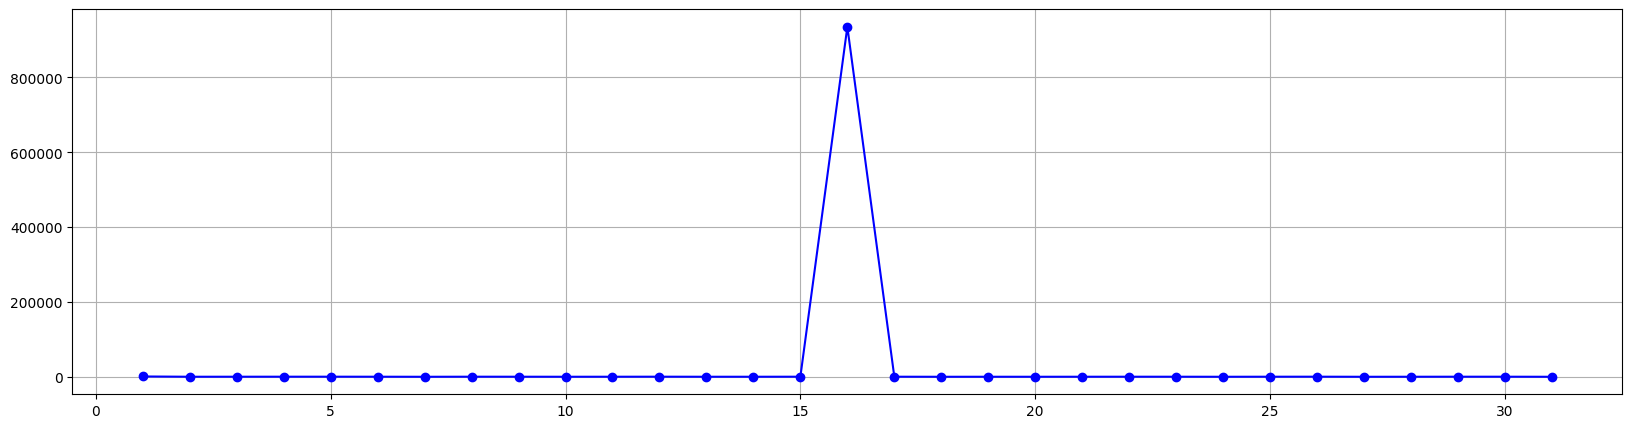

In [90]:
# Create subplots
plt.figure(figsize=(20, 5))
# Daily average plot
day = df.groupby(df['delivery date'].dt.day)['selling_price'].mean()
plt.plot(day, marker='o', linestyle='-', color='b')
plt.grid(True)

In [91]:
df['lead_time_days'] = (df['delivery date'] - df['item_date']).dt.days
df[['item_date', 'delivery date', 'lead_time_days']].head(25)

,item_date,delivery date,lead_time_days
181672,2020-07-02,2020-08-30,59.0
180732,2020-07-02,2020-08-30,59.0
180733,2020-07-02,2020-08-30,59.0
180734,2020-07-02,2020-08-30,59.0
180735,2020-07-02,2020-08-30,59.0
180736,2020-07-02,2020-08-30,59.0
180737,2020-07-02,2020-08-30,59.0
180738,2020-07-02,2020-08-30,59.0
180739,2020-07-02,2020-08-30,59.0
180740,2020-07-02,2020-08-30,59.0


In [92]:
df.shape

(181673, 24)

### Some rubbish values are present in ‘Material_Reference’ which starts with ‘00000’ value which should be converted into null. 

In [93]:
df["material_ref"].head()

181672    0000000000000000000000000000000001005439
180732    0000000000000000000000000000000001005539
180733                               1AMS420NTL34G
180734    0000000000000000000000000000000001000092
180735                                    ACCESS A
Name: material_ref, dtype: object

In [94]:
# Replace values starting with '00000' with NaN
df['material_ref'] = df['material_ref'].replace(r'^00000.*$', np.nan, regex=True)

In [95]:
df["material_ref"].head()

181672              NaN
180732              NaN
180733    1AMS420NTL34G
180734              NaN
180735         ACCESS A
Name: material_ref, dtype: object

Axes(0.125,0.11;0.775x0.77)


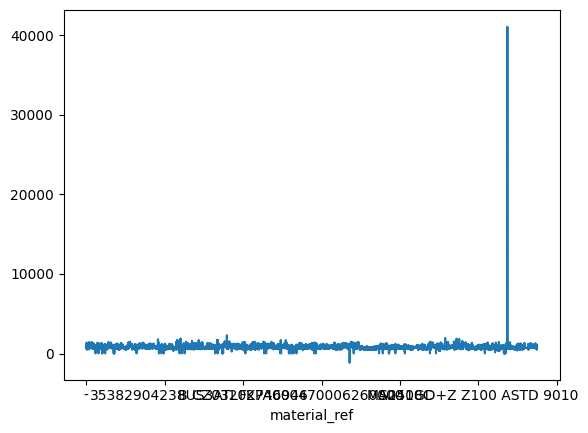

In [96]:
mat_ref = df.groupby(df['material_ref'])['selling_price'].mean().plot()
print(mat_ref)

#### it seems that Only Some categories have high prices, others have low prices, but this difference is specific to each category(maybe outliers)

In [97]:
df.drop(["material_ref"],axis=1,inplace=True)

In [98]:
df.drop(["id"],axis=1,inplace=True) #unique identifier for each row - no need for model building

In [99]:
df.drop(["customer"],axis=1,inplace=True) # as it has 1000+ categories it might not that much affect teh selling_price(Target Variable)

### Treating NULL Values

In [100]:
df_null = df.isnull().sum()
df_null[df_null>0]

item_date                3
quantity tons            1
country                 28
status                   2
application             24
thickness                1
delivery date            3
selling_price            1
order_year               3
order_month              3
order_day                3
order_day_of_week        3
delivery_year            3
delivery_month           3
delivery_day             3
delivery_day_of_week     3
lead_time_days           6
dtype: int64

In [101]:
# am going to drop "Nan" which is so small compare to the df
df.dropna(inplace=True) #drop Nan

In [102]:
df.isnull().sum()

item_date                0
quantity tons            0
country                  0
status                   0
item type                0
application              0
thickness                0
width                    0
product_ref              0
delivery date            0
selling_price            0
order_year               0
order_month              0
order_day                0
order_day_of_week        0
delivery_year            0
delivery_month           0
delivery_day             0
delivery_day_of_week     0
lead_time_days           0
delivery_date_imputed    0
dtype: int64

In [103]:
len(df)

181634

##### treat if there is any negative values in a dataframe

In [105]:
# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['number'])
# Create a boolean DataFrame where True indicates negative values in the numeric columns
negative_cells = numeric_df < 0
# Get the indices (row, column) of the negative values
negative_indices = negative_cells[negative_cells == True].stack().index.tolist()
print(f"Negative values are present at these locations: {negative_indices}")

Negative values are present at these locations: [(181671, 'quantity tons'), (181661, 'quantity tons'), (131473, 'quantity tons'), (105730, 'quantity tons'), (105189, 'selling_price'), (44865, 'selling_price'), (44810, 'selling_price'), (44761, 'selling_price'), (28, 'selling_price')]


In [106]:
# gonna drop this rows as it has only 9 rows
df.drop(df[df['quantity tons'] < 0].index, axis=0, inplace=True)
df.drop(df[df['selling_price'] < 0].index, axis=0, inplace=True)

##### after droping negative values rows

In [107]:
# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['number'])
# Create a boolean DataFrame where True indicates negative values in the numeric columns
negative_cells = numeric_df < 0
# Get the indices (row, column) of the negative values
negative_indices = negative_cells[negative_cells == True].stack().index.tolist()
print(f"Negative values are present at these locations: {negative_indices}")

Negative values are present at these locations: []


### Treat Ouliers

In [108]:
df.select_dtypes(include='number').columns

Index(['quantity tons', 'thickness', 'width', 'selling_price', 'order_year',
       'order_month', 'order_day', 'order_day_of_week', 'delivery_year',
       'delivery_month', 'delivery_day', 'delivery_day_of_week',
       'lead_time_days'],
      dtype='object')

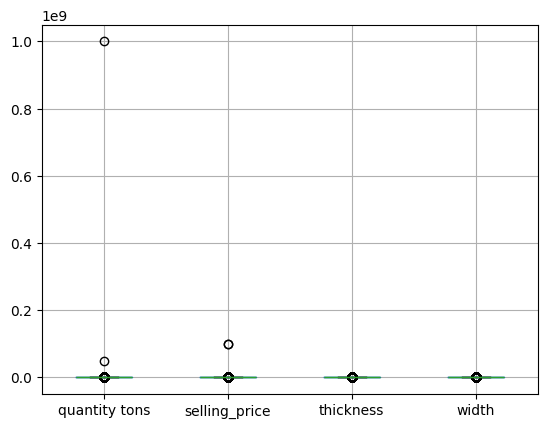

In [109]:
df.boxplot(["quantity tons","selling_price","thickness","width"]) # others are date values
plt.show()

In [110]:
def count_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return len(outliers)
outlier_counts = {
    'thickness': count_outliers_iqr(df, 'thickness'),
    'width': count_outliers_iqr(df, 'width'),
    'selling_price': count_outliers_iqr(df, 'selling_price'),
    'quantity tons':count_outliers_iqr(df,'quantity tons')
}
print(outlier_counts)
max_outliers_column = max(outlier_counts, key=outlier_counts.get)
print(f"Column with most outliers: {max_outliers_column}")

{'thickness': 13947, 'width': 10944, 'selling_price': 4852, 'quantity tons': 20950}
Column with most outliers: quantity tons


#### Cap outliers in specified features using the IQR method to limit extreme values within calculated bounds

In [111]:
def cap_outliers(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[feature] = np.clip(data[feature], lower_bound, upper_bound)

# Apply to relevant features
for feature in ['selling_price', 'quantity tons', 'thickness', 'width']:
    cap_outliers(df, feature)

####  After Treating Outliers

In [112]:
outlier_counts = {
    'thickness': count_outliers_iqr(df, 'thickness'),
    'width': count_outliers_iqr(df, 'width'),
    'selling_price': count_outliers_iqr(df, 'selling_price'),
    'quantity tons':count_outliers_iqr(df,'quantity tons')
}
print(outlier_counts)
max_outliers_column = max(outlier_counts, key=outlier_counts.get)
print(f"Column with most outliers: {max_outliers_column}")

{'thickness': 0, 'width': 0, 'selling_price': 0, 'quantity tons': 0}
Column with most outliers: thickness


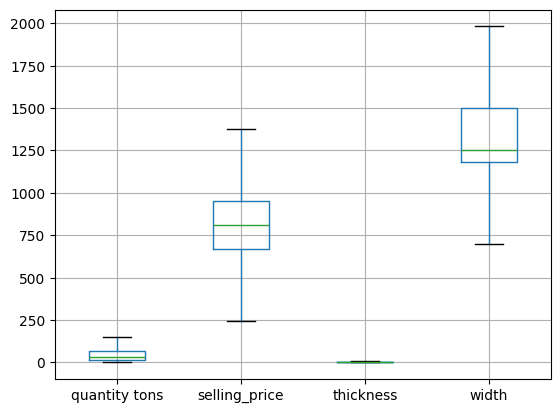

In [113]:
df.boxplot(["quantity tons","selling_price","thickness","width"])
plt.show()

In [114]:
len(df)

181625

### Do some Comparisions between target variable and numeric columns

#### Regression Target Variable - Selling Price

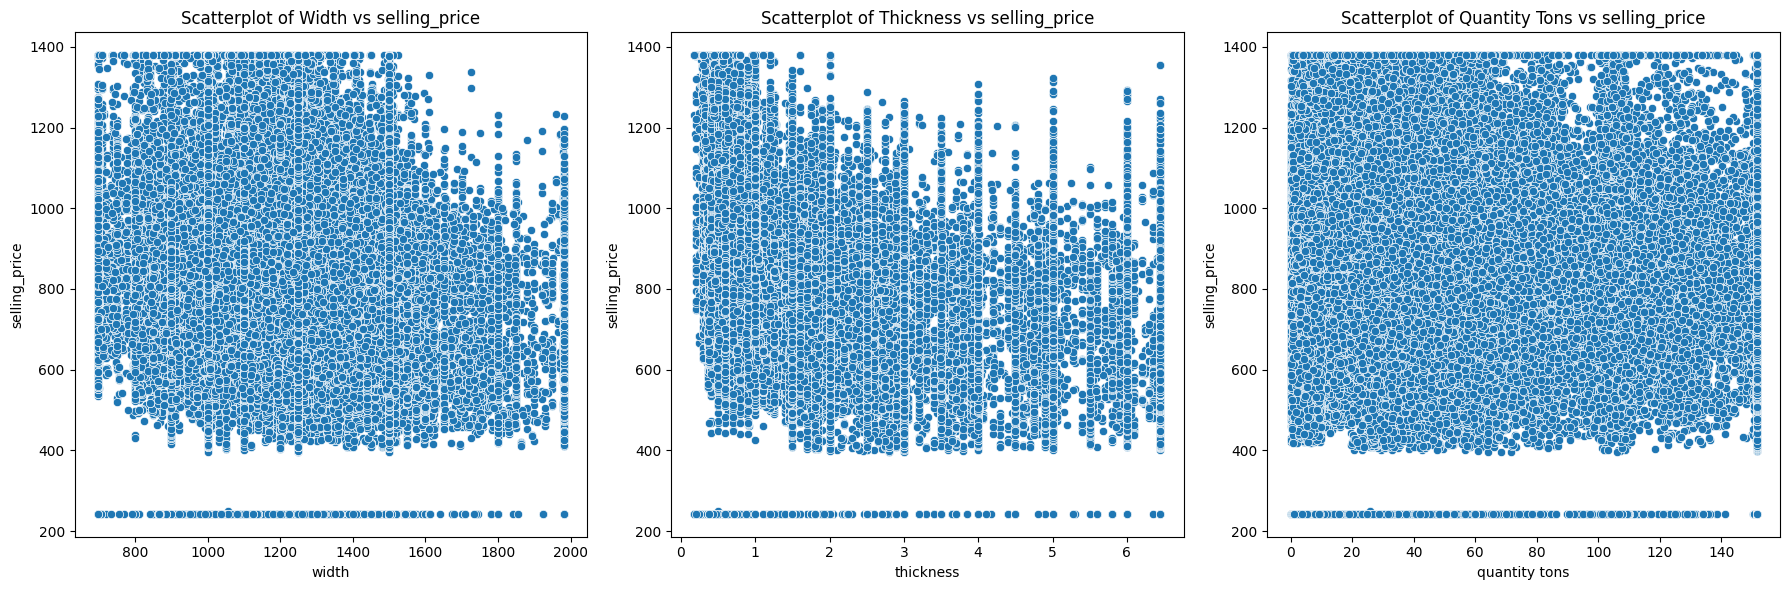

In [115]:
# Create the subplots (3 horizontal)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
# Scatterplot for Width vs Selling Price
sns.scatterplot(ax=axes[0], x=df['width'], y=df['selling_price'])
axes[0].set_title('Scatterplot of Width vs selling_price')
axes[0].set_xlabel('width')
axes[0].set_ylabel('selling_price')
# Scatterplot for Thickness vs Selling Price
sns.scatterplot(ax=axes[1], x=df['thickness'], y=df['selling_price'])
axes[1].set_title('Scatterplot of Thickness vs selling_price')
axes[1].set_xlabel('thickness')
axes[1].set_ylabel('selling_price')
# Scatterplot for Quantity Tons vs Selling Price
sns.scatterplot(ax=axes[2], x=df['quantity tons'], y=df['selling_price'])
axes[2].set_title('Scatterplot of Quantity Tons vs selling_price')
axes[2].set_xlabel('quantity tons')
axes[2].set_ylabel('selling_price')
# Adjust layout to avoid overlap
plt.tight_layout()
# Show the plots
plt.show()

#### Classification Target Variable - Status

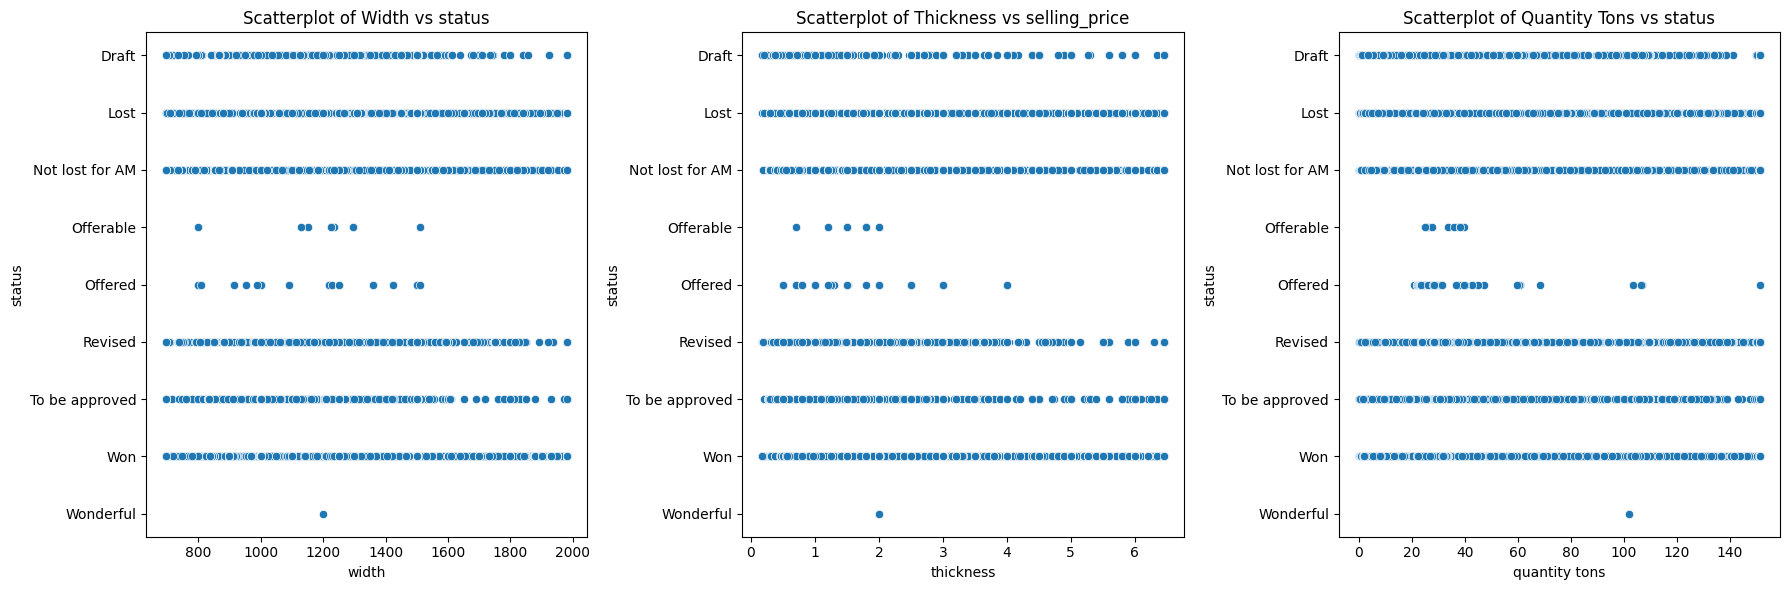

In [116]:
# Create the subplots (3 horizontal)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
# Scatterplot for Width vs Selling Price
sns.scatterplot(ax=axes[0], x=df['width'], y=df['status'])
axes[0].set_title('Scatterplot of Width vs status')
axes[0].set_xlabel('width')
axes[0].set_ylabel('status')
# Scatterplot for Thickness vs Selling Price
sns.scatterplot(ax=axes[1], x=df['thickness'], y=df['status'])
axes[1].set_title('Scatterplot of Thickness vs selling_price')
axes[1].set_xlabel('thickness')
axes[1].set_ylabel('status')
# Scatterplot for Quantity Tons vs Selling Price
sns.scatterplot(ax=axes[2], x=df['quantity tons'], y=df['status'])
axes[2].set_title('Scatterplot of Quantity Tons vs status')
axes[2].set_xlabel('quantity tons')
axes[2].set_ylabel('status')
# Adjust layout to avoid overlap
plt.tight_layout()
# Show the plots
plt.show()

### Treat Skewness 

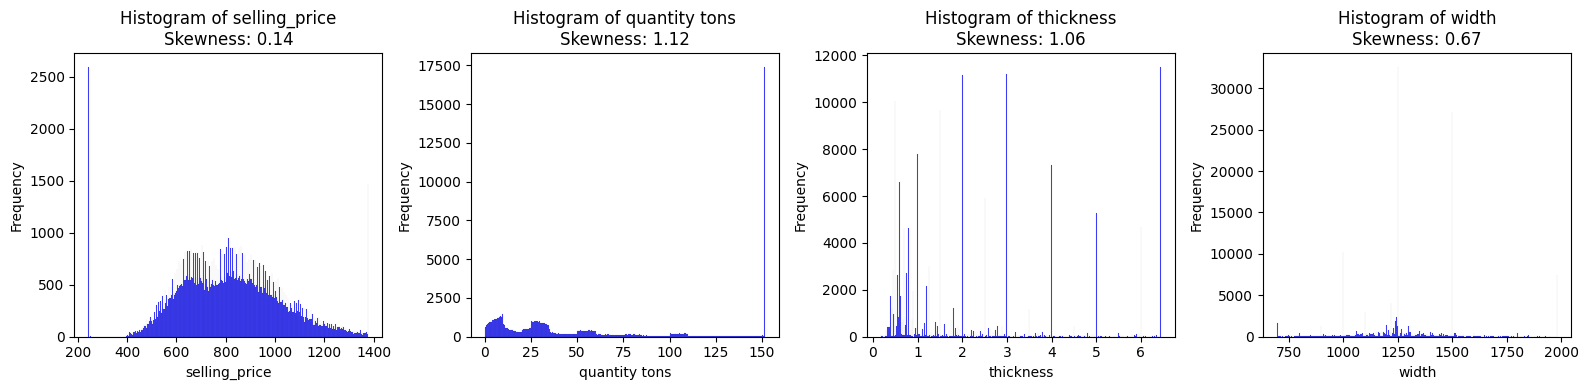

In [117]:
from scipy.stats import skew
# Features to check
features = ['selling_price', 'quantity tons', 'thickness', 'width']
# Take a random sample of 150000 rows for visualization
sample_df = df.sample(150000, random_state=42)
# Initialize a figure for subplots
fig, axes = plt.subplots(1, 4, figsize=(16,4))
# Flatten axes for easier iteration
axes = axes.flatten()
# Loop through features to plot histograms and calculate skewness
for i, feature in enumerate(features):
    sns.histplot(sample_df[feature], ax=axes[i], kde=False, bins=500, color='blue')
    axes[i].set_title(f'Histogram of {feature}\nSkewness: {skew(sample_df[feature]):.2f}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
# Adjust layout
plt.tight_layout()
# Show the plots
plt.show()

In [152]:
# Selling Price: 0.14 Leave it as is since skewness is negligible.
# Quantity Tons: 1.12 (moderately positively skewed) , The distribution has a long tail on the right side,indicating some very high values (outliers).
# Thickness:   1.06 (moderately positively skewed) , Skewness might impact analysis, so applying a transformation
# Width : 0.67 (mildly positively skewed)  , am not gonna treat this

In [118]:
print(df["width"].head())
print(df["thickness"].head())
print(df["quantity tons"].head())

181672    1240.0
180732    1220.0
180733    1226.0
180734    1220.0
180735    1000.0
Name: width, dtype: float64
181672    0.71
180732    0.55
180733    3.00
180734    0.45
180735    0.70
Name: thickness, dtype: float64
181672    151.452242
180732      7.195474
180733      2.819479
180734     51.488791
180735    151.452242
Name: quantity tons, dtype: float64


In [119]:
print(df["thickness"].mean()) 
print(df["thickness"].median()) 
print(df["thickness"].mode()) 

2.2450553943565037
1.5
0    6.45
Name: thickness, dtype: float64


In [120]:
print(df["width"].mean()) 
print(df["width"].median()) 
print(df["width"].mode()) 

1297.0721495939435
1250.0
0    1250.0
Name: width, dtype: float64


In [121]:
print(df["quantity tons"].mean())
print(df["quantity tons"].median())
print(df["quantity tons"].mode())

49.17727989334409
30.36411101
0    151.452242
Name: quantity tons, dtype: float64


In [122]:
print(df["width"].skew()) #---> "MILD SKEWNESSS"
print(df["thickness"].skew()) # ---> RIGHT SKEWED / POSITIVE SKEWED  <-----> MEAN > MEDIAN
print(df["quantity tons"].skew()) # ---> RIGHT SKEWED / POSITIVE SKEWED  <-----> MEAN > MEDIAN
print(df["selling_price"].skew()) #---> "ALMOST ZERO SKEWNESSS"

0.6700480318287417
1.0613011878485952
1.1217593268355668
0.1384290959017065


In [123]:
# Check if there is any negative / zero values in this two cols as it affect the transformation
print(len(df[df["thickness"] <= 0]))
print(len(df[df["quantity tons"] <= 0]))

0
0


#### since there is no negative or zero values we can go for BOXCOX Transformation

In [124]:
from scipy.stats import boxcox
df['thickness_boxcox'], _ = boxcox(df['thickness'])
df['quantity_tons_boxcox'], _ = boxcox(df['quantity tons'])

##### after treating skewness

In [125]:
print(df["thickness_boxcox"].skew()) #---> "ZERO SKEWNESSS NOW"
print(df["quantity_tons_boxcox"].skew()) # ---> SLIGHTLY NEGATIVE BUT ZERO SKEWED but its negligible 

0.02529237168879992
-0.05963416628145241


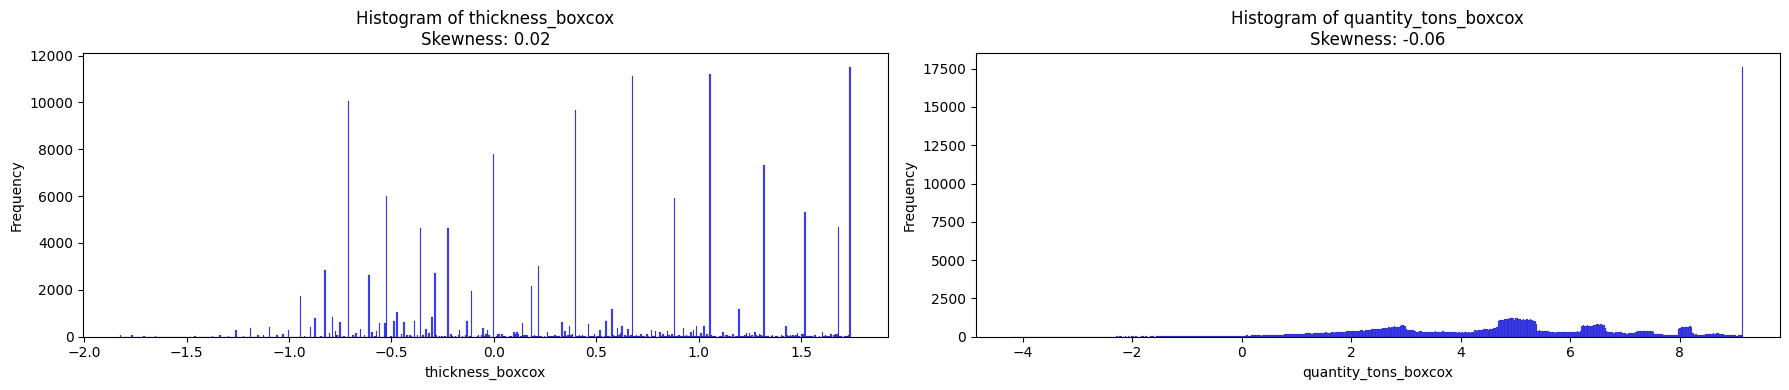

In [126]:
# Features to check
features = ['thickness_boxcox', 'quantity_tons_boxcox']
#Take a random sample of 10,000 rows for visualization
sample_df = df.sample(150000, random_state=42)
# Initialize a figure for subplots
fig, axes = plt.subplots(1, 2, figsize=(18,4))
# Flatten axes for easier iteration
axes = axes.flatten()
# Loop through features to plot histograms and calculate skewness
for i, feature in enumerate(features):
    sns.histplot(sample_df[feature], ax=axes[i], kde=False, bins=500, color='blue')
    axes[i].set_title(f'Histogram of {feature}\nSkewness: {skew(sample_df[feature]):.2f}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
# Adjust layout
plt.tight_layout()
# Show the plots
plt.show()

 The skewness for thickness_boxcox is 0.02, and for quantity_tons_boxcox is -0.06. Both values are close to 0, indicating that the Box-Cox transformation has successfully reduced the skewness and made the data more symmetric.

#### Some Comparisions for how it spread with respect to the target varibale(Regression-Selling_price)

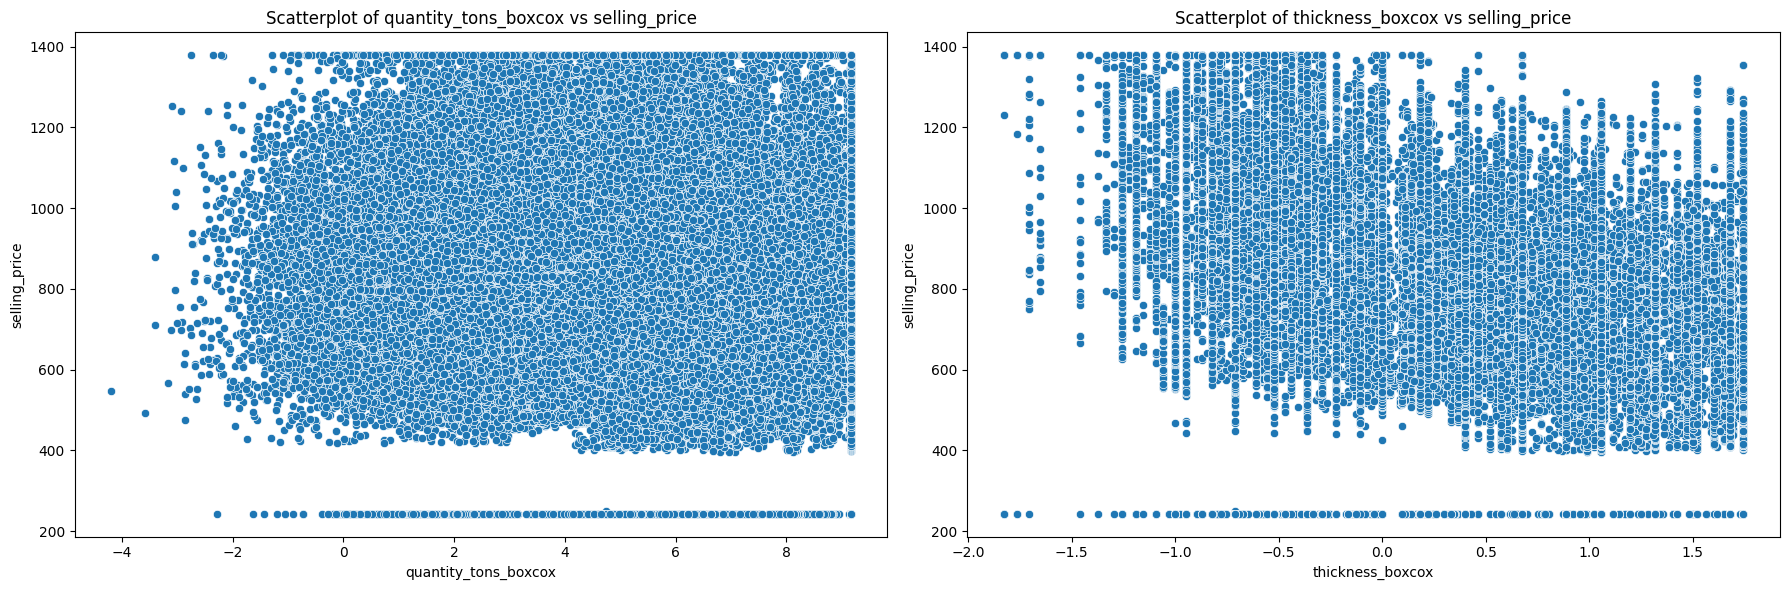

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
# Scatterplot for Width vs Selling Price
sns.scatterplot(ax=axes[0], x=df['quantity_tons_boxcox'], y=df['selling_price'])
axes[0].set_title('Scatterplot of quantity_tons_boxcox vs selling_price')
axes[0].set_xlabel('quantity_tons_boxcox')
axes[0].set_ylabel('selling_price')
# Scatterplot for Thickness vs Selling Price
sns.scatterplot(ax=axes[1], x=df['thickness_boxcox'], y=df['selling_price'])
axes[1].set_title('Scatterplot of thickness_boxcox vs selling_price')
axes[1].set_xlabel('thickness_boxcox')
axes[1].set_ylabel('selling_price')
plt.tight_layout()
plt.show()

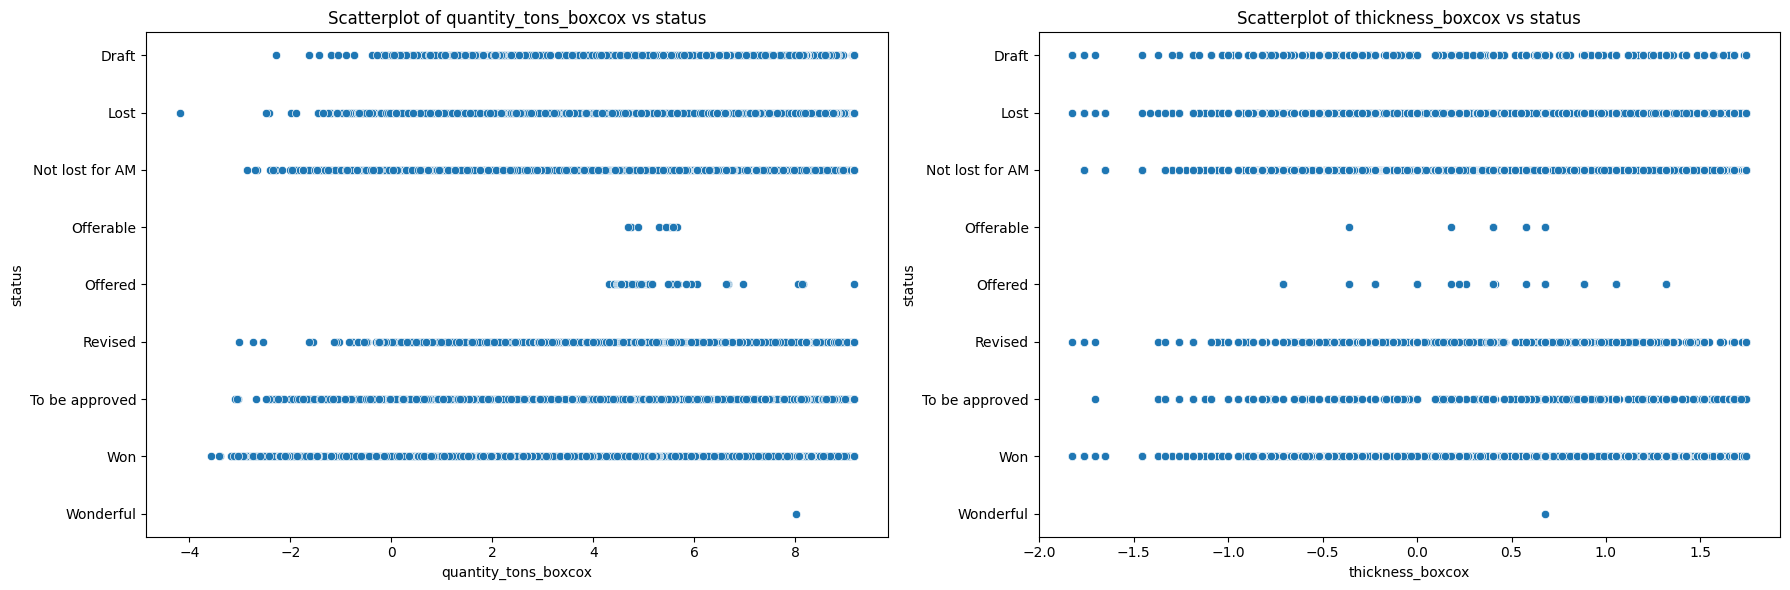

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
# Scatterplot for Width vs Selling Price
sns.scatterplot(ax=axes[0], x=df['quantity_tons_boxcox'], y=df['status'])
axes[0].set_title('Scatterplot of quantity_tons_boxcox vs status')
axes[0].set_xlabel('quantity_tons_boxcox')
axes[0].set_ylabel('status')
# Scatterplot for Thickness vs Selling Price
sns.scatterplot(ax=axes[1], x=df['thickness_boxcox'], y=df['status'])
axes[1].set_title('Scatterplot of thickness_boxcox vs status')
axes[1].set_xlabel('thickness_boxcox')
axes[1].set_ylabel('status')
plt.tight_layout()
plt.show()

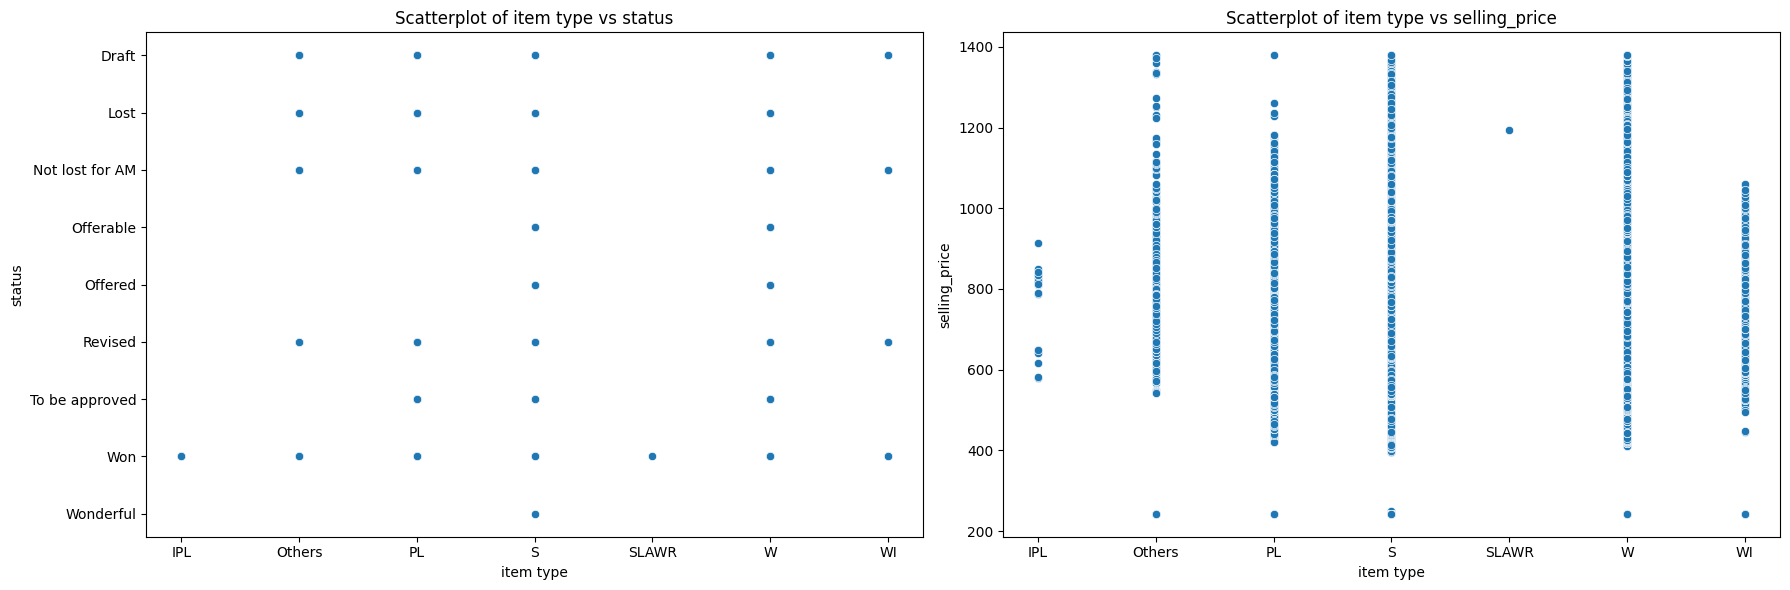

In [129]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
# Scatterplot for Width vs Selling Price
sns.scatterplot(ax=axes[0], x=df['item type'], y=df['status'])
axes[0].set_title('Scatterplot of item type vs status')
axes[0].set_xlabel('item type')
axes[0].set_ylabel('status')
# Scatterplot for Thickness vs Selling Price
sns.scatterplot(ax=axes[1], x=df['item type'], y=df['selling_price'])
axes[1].set_title('Scatterplot of item type vs selling_price')
axes[1].set_xlabel('item type')
axes[1].set_ylabel('selling_price')
plt.tight_layout()
plt.show()

In [130]:
print(df["thickness"].head())
print(df["quantity tons"].head())

181672    0.71
180732    0.55
180733    3.00
180734    0.45
180735    0.70
Name: thickness, dtype: float64
181672    151.452242
180732      7.195474
180733      2.819479
180734     51.488791
180735    151.452242
Name: quantity tons, dtype: float64


### ENCODING CATEGORICAL VARIABLES

In [131]:
catobj_cols = df.select_dtypes(include=["category","object"]) #country,status,item type ,application,product_ref

In [132]:
type(catobj_cols)

pandas.core.frame.DataFrame

In [133]:
catobj_cols.head()

,country,status,item type,application,product_ref
181672,25.0,Won,W,41.0,164141591
180732,25.0,Won,W,41.0,611993
180733,84.0,Won,W,10.0,1670798778
180734,25.0,Won,W,41.0,611993
180735,27.0,Won,S,41.0,611993


In [134]:
catobj_cols.nunique()

country        17
status          9
item type       7
application    30
product_ref    33
dtype: int64

In [135]:
for i in catobj_cols.columns :
    print(catobj_cols[i].value_counts(),sep="\t")

country
78.0     32082
26.0     27514
25.0     23358
27.0     21506
32.0     18657
28.0     15822
84.0     12776
77.0      9713
30.0      8701
39.0      3731
79.0      2742
38.0      1712
40.0      1683
80.0       817
113.0      714
89.0        92
107.0        5
Name: count, dtype: int64
status
Won                115999
Lost                34431
Not lost for AM     19567
Revised              4276
To be approved       4168
Draft                3120
Offered                53
Offerable              10
Wonderful               1
Name: count, dtype: int64
item type
W         105604
S          69200
PL          5659
Others       610
WI           524
IPL           27
SLAWR          1
Name: count, dtype: int64
application
10.0    77534
41.0    46254
15.0    20769
59.0     8926
42.0     5857
56.0     4846
29.0     1937
27.0     1784
26.0     1650
28.0     1591
40.0     1576
25.0     1498
79.0     1422
22.0     1023
20.0      768
66.0      718
3.0       657
38.0      511
58.0      447
4.0       2

In [136]:
len(df)

181625

In [137]:
print(df["status"].nunique()) #9 
print(df["status"].value_counts()) # Won / Lost / Not Lost for AM / To be approved / Draft / Revised / Offered / Offerable / Wonerful
print(df["item type"].nunique()) #7 
print(df["item type"].value_counts()) # W / S / PL / Others /WI / IPL / SLAWR
# (because both of the above cols are not ordinal i'll go for Label Encoding)

9
status
Won                115999
Lost                34431
Not lost for AM     19567
Revised              4276
To be approved       4168
Draft                3120
Offered                53
Offerable              10
Wonderful               1
Name: count, dtype: int64
7
item type
W         105604
S          69200
PL          5659
Others       610
WI           524
IPL           27
SLAWR          1
Name: count, dtype: int64


In [138]:
df.shape

(181625, 23)

In [139]:
from sklearn.preprocessing import LabelEncoder

In [140]:
encoder = LabelEncoder()
df['status_encoded'] = encoder.fit_transform(df['status'])
mapping = dict(zip(encoder.classes_, range(len(encoder.classes_))))
print(mapping)

{'Draft': 0, 'Lost': 1, 'Not lost for AM': 2, 'Offerable': 3, 'Offered': 4, 'Revised': 5, 'To be approved': 6, 'Won': 7, 'Wonderful': 8}


In [141]:
encoder1 = LabelEncoder()
df['item_type_encoded'] = encoder1.fit_transform(df['item type'])
mapping = dict(zip(encoder1.classes_, range(len(encoder1.classes_))))
print(mapping)

{'IPL': 0, 'Others': 1, 'PL': 2, 'S': 3, 'SLAWR': 4, 'W': 5, 'WI': 6}


In [142]:
df.to_csv(r"d:\CAPSTONE\COPPER\Data.csv", index=False)

In [144]:
reg = pd.read_csv(r"D:\CAPSTONE\COPPER\Data.csv")

In [145]:
reg.columns

Index(['item_date', 'quantity tons', 'country', 'status', 'item type',
       'application', 'thickness', 'width', 'product_ref', 'delivery date',
       'selling_price', 'order_year', 'order_month', 'order_day',
       'order_day_of_week', 'delivery_year', 'delivery_month', 'delivery_day',
       'delivery_day_of_week', 'lead_time_days', 'delivery_date_imputed',
       'thickness_boxcox', 'quantity_tons_boxcox', 'status_encoded',
       'item_type_encoded'],
      dtype='object')

In [146]:
reg["delivery date"].head()

0    2020-08-30
1    2020-08-30
2    2020-08-30
3    2020-08-30
4    2020-08-30
Name: delivery date, dtype: object

In [147]:
reg.columns = reg.columns.str.replace(" ", "_")

In [148]:
reg.columns

Index(['item_date', 'quantity_tons', 'country', 'status', 'item_type',
       'application', 'thickness', 'width', 'product_ref', 'delivery_date',
       'selling_price', 'order_year', 'order_month', 'order_day',
       'order_day_of_week', 'delivery_year', 'delivery_month', 'delivery_day',
       'delivery_day_of_week', 'lead_time_days', 'delivery_date_imputed',
       'thickness_boxcox', 'quantity_tons_boxcox', 'status_encoded',
       'item_type_encoded'],
      dtype='object')

In [149]:
reg["delivery_date"].head()

0    2020-08-30
1    2020-08-30
2    2020-08-30
3    2020-08-30
4    2020-08-30
Name: delivery_date, dtype: object

In [150]:
reg.dtypes

item_date                 object
quantity_tons            float64
country                  float64
status                    object
item_type                 object
application              float64
thickness                float64
width                    float64
product_ref                int64
delivery_date             object
selling_price            float64
order_year               float64
order_month              float64
order_day                float64
order_day_of_week        float64
delivery_year            float64
delivery_month           float64
delivery_day             float64
delivery_day_of_week     float64
lead_time_days           float64
delivery_date_imputed       bool
thickness_boxcox         float64
quantity_tons_boxcox     float64
status_encoded             int64
item_type_encoded          int64
dtype: object

In [151]:
reg['country'] = reg['country'].astype('category')
reg['item_type'] = reg['item_type'].astype('category')
reg['application'] = reg['application'].astype('category')
reg["product_ref"] = reg["product_ref"].astype('category')
reg['delivery_date'] = pd.to_datetime(reg['delivery_date'], format='%Y-%m-%d', errors='coerce')
reg['item_date'] = pd.to_datetime(reg['item_date'], format='%Y-%m-%d', errors='coerce')
reg['quantity_tons'] = pd.to_numeric(reg['quantity_tons'], errors='coerce')
reg["status"] = reg["status"].astype('category')

In [152]:
reg["delivery_date"]

0        2020-08-30
1        2020-08-30
2        2020-08-30
3        2020-08-30
4        2020-08-30
            ...    
181620   2021-08-01
181621   2021-07-01
181622   2021-08-01
181623   2021-08-01
181624   2021-07-01
Name: delivery_date, Length: 181625, dtype: datetime64[ns]

In [154]:
# Extract useful features from delivery_date (ignoring the 'day' column)
reg['delivery_year'] = reg['delivery_date'].dt.year
reg['delivery_month'] = reg['delivery_date'].dt.month
reg['delivery_day'] = reg['delivery_date'].dt.day
reg['delivery_day_of_week'] = reg['delivery_date'].dt.dayofweek  # Monday=0, Sunday=6

In [155]:
reg[["delivery_date","item_date",'delivery_year', 'delivery_month', 'delivery_day',"order_month","order_year","order_day"]]

,delivery_date,item_date,delivery_year,delivery_month,delivery_day,order_month,order_year,order_day
0,2020-08-30,2020-07-02,2020,8,30,7.0,2020.0,2.0
1,2020-08-30,2020-07-02,2020,8,30,7.0,2020.0,2.0
2,2020-08-30,2020-07-02,2020,8,30,7.0,2020.0,2.0
3,2020-08-30,2020-07-02,2020,8,30,7.0,2020.0,2.0
4,2020-08-30,2020-07-02,2020,8,30,7.0,2020.0,2.0
...,...,...,...,...,...,...,...,...
181620,2021-08-01,2021-04-01,2021,8,1,4.0,2021.0,1.0
181621,2021-07-01,2021-04-01,2021,7,1,4.0,2021.0,1.0
181622,2021-08-01,2021-04-01,2021,8,1,4.0,2021.0,1.0
181623,2021-08-01,2021-04-01,2021,8,1,4.0,2021.0,1.0


In [156]:
reg.columns

Index(['item_date', 'quantity_tons', 'country', 'status', 'item_type',
       'application', 'thickness', 'width', 'product_ref', 'delivery_date',
       'selling_price', 'order_year', 'order_month', 'order_day',
       'order_day_of_week', 'delivery_year', 'delivery_month', 'delivery_day',
       'delivery_day_of_week', 'lead_time_days', 'delivery_date_imputed',
       'thickness_boxcox', 'quantity_tons_boxcox', 'status_encoded',
       'item_type_encoded'],
      dtype='object')

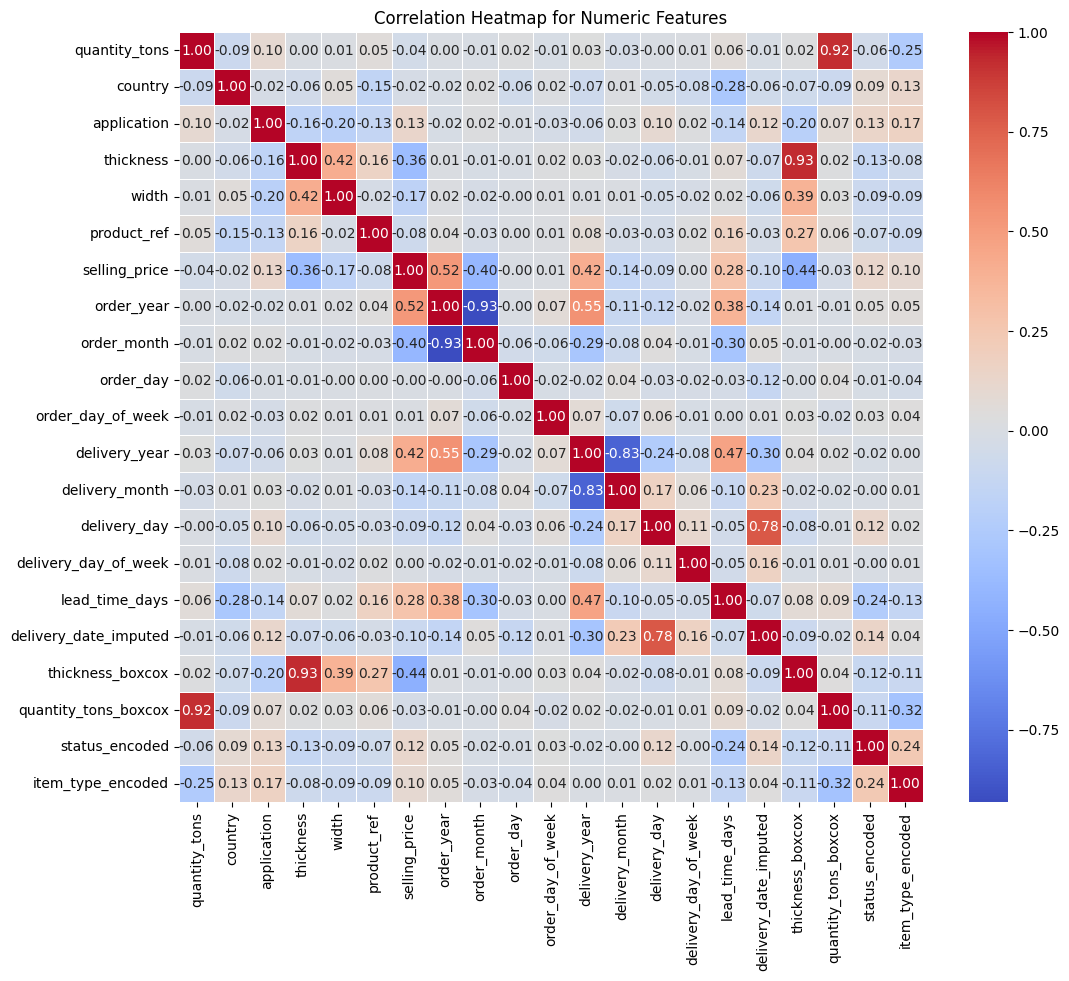

In [157]:
numeric_cols = [
    'quantity_tons', 'country', 'application', 'thickness', 'width', 'product_ref', 
    'selling_price', 'order_year', 'order_month', 'order_day', 'order_day_of_week', 
    'delivery_year', 'delivery_month', 'delivery_day', 'delivery_day_of_week', 
    'lead_time_days', 'delivery_date_imputed', 'thickness_boxcox', 'quantity_tons_boxcox', 
    'status_encoded', 'item_type_encoded'
]
numeric_df = reg[numeric_cols]
# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()
# Create the heatmap for the correlation matrix
plt.figure(figsize=(12, 10))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Numeric Features')
plt.show()

In [165]:
a = reg[['country', 'status_encoded', 'item_type_encoded','order_year', 'order_month', 'order_day','delivery_year',
            'delivery_month', 'delivery_day','application',  'width', 'product_ref', 'thickness_boxcox', 'quantity_tons_boxcox']]
b = reg[["selling_price"]]

In [166]:
a.isnull().sum()

country                 0
status_encoded          0
item_type_encoded       0
order_year              0
order_month             0
order_day               0
delivery_year           0
delivery_month          0
delivery_day            0
application             0
width                   0
product_ref             0
thickness_boxcox        0
quantity_tons_boxcox    0
dtype: int64

In [167]:
b.isnull().sum()

selling_price    0
dtype: int64

In [168]:
a.head()

,country,status_encoded,item_type_encoded,order_year,order_month,order_day,delivery_year,delivery_month,delivery_day,application,width,product_ref,thickness_boxcox,quantity_tons_boxcox
0,25.0,7,5,2020.0,7.0,2.0,2020,8,30,41.0,1240.0,164141591,-0.346787,9.159970
1,25.0,7,5,2020.0,7.0,2.0,2020,8,30,41.0,1220.0,611993,-0.611012,2.470155
2,84.0,7,5,2020.0,7.0,2.0,2020,8,30,10.0,1226.0,1670798778,1.055907,1.164009
3,25.0,7,5,2020.0,7.0,2.0,2020,8,30,41.0,1220.0,611993,-0.822127,6.267053
4,27.0,7,3,2020.0,7.0,2.0,2020,8,30,41.0,1000.0,611993,-0.361337,9.159970


In [169]:
a.dtypes

country                 category
status_encoded             int64
item_type_encoded          int64
order_year               float64
order_month              float64
order_day                float64
delivery_year              int32
delivery_month             int32
delivery_day               int32
application             category
width                    float64
product_ref             category
thickness_boxcox         float64
quantity_tons_boxcox     float64
dtype: object

In [170]:
b.head()

,selling_price
0,607.00
1,1024.00
2,600.38
3,846.00
4,722.48


In [171]:
len(a),len(b)

(181625, 181625)

In [172]:
#import the needed package,models and metrics for aplitting the data building and evaluating the Regression Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### LinearRegression

In [198]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(a, b, test_size=0.10, random_state=42) #after testing for 25%,15% fix to 10-90%

In [199]:
len(X_train1),len(y_train1),len(X_test1),len(y_test1)

(163462, 163462, 18163, 18163)

In [200]:
model1 = LinearRegression()

In [201]:
model1.fit(X_train1,y_train1)

LinearRegression()

In [202]:
predictions1 = model1.predict(X_test1)
predictions1

array([[796.54399873],
       [640.43010615],
       [811.00445305],
       ...,
       [828.41294067],
       [874.30100803],
       [847.68160418]])

In [203]:
# calculate these metrics by hand!
print('MAE:', mean_absolute_error(y_test1, predictions1))
print('MSE:',mean_squared_error(y_test1, predictions1))
print('RMSE:', np.sqrt(mean_squared_error(y_test1, predictions1)))
print("r_squared",r2_score(y_test1,predictions1))

MAE: 96.84756494770431
MSE: 20251.53531578927
RMSE: 142.30788915513176
r_squared 0.53902700282607


#### Test for Linear Regression

In [ ]:
user_data = np.array([[28.0, 7, 5, 2021.0, 4.0, 1.0, 2021.0, 7.0, 1.0, 10.0, 1500.0, 1670798778, 0.675981,6.387516]])
y_predic = model1.predict(user_data)
print("Predicted selling price : ",y_predic[0]) #original is 854.0 predicted is 979.10490346

Predicted selling price :  [979.10490346]


C:\Users\nandh\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [205]:
user_data = np.array([[25.0, 7, 5, 2020.0, 7.0, 2.0,2020.0, 8.0, 3.0, 41.0, 1240.0, 164141591, -0.346787,9.15997]])
y_predic = model1.predict(user_data)
print("Predicted selling price with Log: ",y_predic[0]) #original is 607.0 predicted is 726.86532397

Predicted selling price with Log:  [726.86532397]


C:\Users\nandh\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#### RandomFroestReggressor

In [211]:
x_train2, x_test2, Y_train2, Y_test2 = train_test_split(a, b, test_size=0.35, random_state=42)

In [212]:
rf = RandomForestRegressor()

In [213]:
rf.fit(x_train2, Y_train2)

C:\Users\nandh\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [214]:
# Make predictions on the test set
predictions2 = rf.predict(x_test2)

In [215]:
# Evaluate the model
mse = mean_squared_error(Y_test2, predictions2)  # Mean Squared Error
rmse= np.sqrt(mse)
mae= mean_absolute_error(Y_test2,predictions2)
r2 = r2_score(Y_test2, predictions2)  # R-squared (Coefficient of Determination)
print(f"Mean Squared Error: {mse}")
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print(f"R-squared: {round(r2,2)}")  

Mean Squared Error: 2101.1906743986
Root Mean Squared Error (RMSE): 45.83874643136088
Mean Absolute Error (MAE): 26.97403668393466
R-squared: 0.95


#### Test for Random Forest

In [216]:
user_data = np.array([[28.0, 7, 5, 2021.0, 4.0, 1.0, 2021.0, 7.0, 1.0, 10.0, 1500.0, 1670798778, 0.675981,6.387516]])
predictions2 = rf.predict(user_data)
print("Predicted selling price : ",predictions2[0]) #original is 854.0 predicted is 1029.57

Predicted selling price :  1029.57


C:\Users\nandh\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [218]:
user_data = np.array([[25.0, 7, 5, 2020.0, 7.0, 2.0,2020.0, 8.0, 3.0, 41.0, 1240.0, 164141591, -0.346787,9.15997]])
predictions2 = rf.predict(user_data)
print("Predicted selling price with Log: ",predictions2[0]) #original is 607.0 predicted is 624.0142999999998

Predicted selling price with Log:  624.0142999999998


C:\Users\nandh\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


#### Decision Tree Regressor

In [219]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(a, b, test_size=0.35, random_state=42)

In [220]:
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train3, y_train3)

DecisionTreeRegressor(random_state=42)

In [221]:
predictions3 = tree.predict(X_test3)

In [238]:
# Evaluate the model
mse = mean_squared_error(y_test3, predictions3)  # Mean Squared Error
rmse= np.sqrt(mse)
mae= mean_absolute_error(y_test3,predictions3)
r2 = r2_score(y_test3, predictions3)  # R-squared (Coefficient of Determination)
print(f"Mean Squared Error: {mse}")
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print(f"R-squared: {r2}")  

Mean Squared Error: 3608.4598192608346
Root Mean Squared Error (RMSE): 60.07045712545256
Mean Absolute Error (MAE): 32.78477395482279
R-squared: 0.9174674116758711


#### test

In [240]:
user_data = np.array([[25.0, 7, 5, 2020.0, 7.0, 2.0,2020.0, 8.0, 3.0, 41.0, 1240.0, 164141591, -0.346787,9.15997]])
y_prediction = tree.predict(user_data)
print("Predicted selling price with Log: ",y_prediction[0]) #original is 607.0 predicted is 663.5

Predicted selling price with Log:  663.5


C:\Users\nandh\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


#### Lets Do Some Hyper Parameter Changes On the Decicion Tree Regressor

In [223]:
from sklearn.model_selection import RandomizedSearchCV

In [225]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(a, b, test_size=0.25, random_state=42)

In [226]:
tree1 = DecisionTreeRegressor(random_state=42)

In [228]:
params = {
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}
random_search = RandomizedSearchCV(estimator=tree1,
                                   param_distributions=params,
                                   n_iter=20,  
                                   cv=3,
                                   n_jobs=-1, 
                                   verbose=2, 
                                   random_state=42)
# Fit the model to the training data
random_search.fit(X_train4, y_train4)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'friedman_mse',
                                                      'poisson'],
                                        'max_depth': [3, 5, 10, None],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42, verbose=2)

In [229]:
print("Best Hyperparameters from RandomizedSearchCV:", random_search.best_params_)

Best Hyperparameters from RandomizedSearchCV: {'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': None, 'criterion': 'absolute_error'}


In [230]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(a, b, test_size=0.30, random_state=42)

In [231]:
tree2 = DecisionTreeRegressor(min_samples_split=2,min_samples_leaf=4,max_features=None,max_depth=None,
    criterion='absolute_error',random_state=42)

In [232]:
tree2.fit(X_train5, y_train5)

DecisionTreeRegressor(criterion='absolute_error', min_samples_leaf=4,
                      random_state=42)

In [235]:
predictions4 = tree2.predict(X_test5)

In [237]:
# Evaluate the model
mse = mean_squared_error(y_test5, predictions4)  # Mean Squared Error
rmse= np.sqrt(mse)
mae= mean_absolute_error(y_test5,predictions4)
r2 = r2_score(y_test5, predictions4)  # R-squared (Coefficient of Determination)
print(f"Mean Squared Error: {mse}")
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print(f"R-squared: {r2}")

Mean Squared Error: 3396.434530572328
Root Mean Squared Error (RMSE): 58.27893728073916
Mean Absolute Error (MAE): 32.54112914770224
R-squared: 0.9224705725017873


#### test for decision tree

In [ ]:
user_data = np.array([[25.0, 7, 5, 2020.0, 7.0, 2.0,2020.0, 8.0, 3.0, 41.0, 1240.0, 164141591, -0.346787,9.15997]])
y_prediction = tree2.predict(user_data)
print("Predicted selling price with Log: ",y_prediction[0]) #original is 607.0 predicted is 622.0

Predicted selling price with Log:  622.0


C:\Users\nandh\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


##### Go with DecisionTreeRegressor with the Hyper paramters that suggest by RandomizedSeacrhVc 

In [242]:
with open(r"D:/CAPSTONE/COPPER/Regression_Model.pkl","wb") as r:
  pickle.dump(tree2,r)
with open(r"D:/CAPSTONE/COPPER/Regression_Model.pkl","rb") as r1:
  regg_model=pickle.load(r1)

In [243]:
user_data = np.array([[28.0, 7, 5, 2021.0, 4.0, 1.0, 2021.0, 7.0, 1.0, 10.0, 1500.0, 1670798778, 0.675981,6.387516]])
predictions2 = regg_model.predict(user_data)
print("Predicted selling price : ",predictions2[0]) #original is 854.0 predicted is 971.0

Predicted selling price :  971.0


C:\Users\nandh\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


### Classification Model

In [431]:
clss = reg.copy()

In [432]:
clss.columns

Index(['item_date', 'quantity_tons', 'country', 'status', 'item_type',
       'application', 'thickness', 'width', 'product_ref', 'delivery_date',
       'selling_price', 'order_year', 'order_month', 'order_day',
       'order_day_of_week', 'delivery_year', 'delivery_month', 'delivery_day',
       'delivery_day_of_week', 'lead_time_days', 'delivery_date_imputed',
       'thickness_boxcox', 'quantity_tons_boxcox', 'status_encoded',
       'item_type_encoded'],
      dtype='object')

In [433]:
clss.dtypes

item_date                datetime64[ns]
quantity_tons                   float64
country                        category
status                         category
item_type                      category
application                    category
thickness                       float64
width                           float64
product_ref                    category
delivery_date            datetime64[ns]
selling_price                   float64
order_year                      float64
order_month                     float64
order_day                       float64
order_day_of_week               float64
delivery_year                     int32
delivery_month                    int32
delivery_day                      int32
delivery_day_of_week              int32
lead_time_days                  float64
delivery_date_imputed              bool
thickness_boxcox                float64
quantity_tons_boxcox            float64
status_encoded                    int64
item_type_encoded                 int64


In [435]:
# Filter the rows to keep only 'Won' and 'Lost'
clss = clss[clss['status'].isin(['Won', 'Lost'])]

# Set the categories to only 'Won' and 'Lost'
clss['status'] = clss['status'].cat.set_categories(['Won', 'Lost'])

# Check the unique values and categories
print(clss['status'].unique())  # Should show only ['Won', 'Lost']
print(clss['status'].cat.categories)  # Should show ['Won', 'Lost']

['Won', 'Lost']
Categories (2, object): ['Won', 'Lost']
Index(['Won', 'Lost'], dtype='object')


In [436]:
clss.shape

(150430, 25)

In [437]:
clss["status"].nunique()

2

In [438]:
c = clss[['country','selling_price','item_type_encoded','order_year','order_month','order_day','delivery_year',
      'delivery_month','delivery_day','application','width','product_ref','thickness_boxcox','quantity_tons_boxcox']]
d = clss["status"]

In [439]:
c.shape,d.shape

((150430, 14), (150430,))

#### IMBALANCED DATA

In [440]:
#train_test_data_split 
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(c,d, test_size=0.2, random_state=42) 

In [441]:
X_train_1.shape,X_test_1.shape,y_train_1.shape,y_test_1.shape

((120344, 14), (30086, 14), (120344,), (30086,))

In [442]:
y_test_1.unique()

['Won', 'Lost']
Categories (2, object): ['Won', 'Lost']

In [443]:
y_test_1 = y_test_1.replace({"Won":1, "Lost":0})

C:\Users\nandh\AppData\Local\Temp\ipykernel_12528\754185567.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test_1 = y_test_1.replace({"Won":1, "Lost":0})
C:\Users\nandh\AppData\Local\Temp\ipykernel_12528\754185567.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  y_test_1 = y_test_1.replace({"Won":1, "Lost":0})


In [444]:
y_test_1.unique()

[1, 0]
Categories (2, int64): [1, 0]

In [446]:
y_test_1.value_counts()

status
1    23162
0     6924
Name: count, dtype: int64

In [447]:
# Convert categorical columns to category dtype
X_train_1['country'] = X_train_1['country'].astype('category')
X_train_1['application'] = X_train_1['application'].astype('category')
X_train_1['product_ref'] = X_train_1['product_ref'].astype('category')

##### OVERSAMPLING THE DATA USING SMOTENC-This is an oversampling technique from the imbalanced-learn library that works with both numerical and categorical features.

In [273]:
# ! pip install imbalanced-learn

In [448]:
y_train_1.isnull().sum()

0

In [449]:
for index, column in enumerate(X_train_1.columns):
    print(f"Column '{column}' is at index position {index}")

Column 'country' is at index position 0
Column 'selling_price' is at index position 1
Column 'item_type_encoded' is at index position 2
Column 'order_year' is at index position 3
Column 'order_month' is at index position 4
Column 'order_day' is at index position 5
Column 'delivery_year' is at index position 6
Column 'delivery_month' is at index position 7
Column 'delivery_day' is at index position 8
Column 'application' is at index position 9
Column 'width' is at index position 10
Column 'product_ref' is at index position 11
Column 'thickness_boxcox' is at index position 12
Column 'quantity_tons_boxcox' is at index position 13


In [450]:
from imblearn.over_sampling import SMOTENC
cat_cols = [0,9,11]
# Apply SMOTE-NC
smote_nc = SMOTENC(categorical_features=cat_cols, random_state=42)
X_resampled, y_resampled = smote_nc.fit_resample(X_train_1,y_train_1)

In [454]:
# Check for missing values in the resampled data
print(X_resampled.isnull().sum())
print(y_resampled.isnull().sum())

country                 0
selling_price           0
item_type_encoded       0
order_year              0
order_month             0
order_day               0
delivery_year           0
delivery_month          0
delivery_day            0
application             0
width                   0
product_ref             0
thickness_boxcox        0
quantity_tons_boxcox    0
dtype: int64
0


In [455]:
len(X_resampled),len(y_resampled)

(185674, 185674)

In [456]:
X_resampled.shape,y_resampled.shape

((185674, 14), (185674,))

In [457]:
y_resampled.value_counts() # NOW DATA BALANCED

status
Won     92837
Lost    92837
Name: count, dtype: int64

In [479]:
y_resampled = y_resampled.replace({"Won":1, "Lost":0})
# y_resampled = y_resampled.replace({"1":1, "0":0})

C:\Users\nandh\AppData\Local\Temp\ipykernel_12528\1760036399.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_resampled = y_resampled.replace({"1":1, "0":0})
C:\Users\nandh\AppData\Local\Temp\ipykernel_12528\1760036399.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  y_resampled = y_resampled.replace({"1":1, "0":0})


#### 1.DECISION TREE

In [480]:
from sklearn.tree import DecisionTreeClassifier

In [481]:
tre = DecisionTreeClassifier(max_depth=50,min_samples_split=25,random_state=2)

In [482]:
tre.fit(X_resampled, y_resampled)

DecisionTreeClassifier(max_depth=50, min_samples_split=25, random_state=2)

In [483]:
y_pred_train= tre.predict(X_resampled)
y_pred_test= tre.predict(X_test_1)

In [484]:
y_pred_train =(tre.predict_proba(X_resampled)[:, 1] > 0.5).astype(int)
y_pred_test = (tre.predict_proba(X_test_1)[:, 1] > 0.5).astype(int)

In [485]:
len(y_resampled),len(y_test_1),len(y_pred_train),len(y_pred_test)

(185674, 30086, 185674, 30086)

In [486]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [487]:
y_resampled.unique

<bound method Series.unique of 0         1
1         1
2         1
3         0
4         1
         ..
185669    0
185670    0
185671    0
185672    0
185673    0
Name: status, Length: 185674, dtype: category
Categories (2, int64): [1, 0]>

In [489]:
print(y_pred_test)
print(y_pred_train)

[1 1 0 ... 1 1 1]
[1 1 1 ... 0 0 0]


In [494]:
#traning accuracy
accuracy_train= accuracy_score(y_resampled, y_pred_train)
print("Accuracy_Train: ",accuracy_train)
#testing accuracy
accuracy_test= accuracy_score(y_test_1, y_pred_test)
print("Accuracy_Test: ",accuracy_test)
#confusion_matrix
print(confusion_matrix(y_true= y_test_1, y_pred= y_pred_test))
#classification report
print(classification_report(y_true= y_test_1, y_pred= y_pred_test)) 

Accuracy_Train:  0.9611469564936393
Accuracy_Test:  0.915608588712358
[[ 6127   797]
 [ 1742 21420]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.83      6924
           1       0.96      0.92      0.94     23162

    accuracy                           0.92     30086
   macro avg       0.87      0.90      0.89     30086
weighted avg       0.92      0.92      0.92     30086



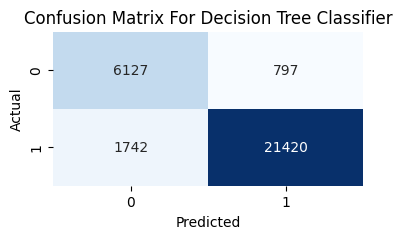

In [495]:
cm = confusion_matrix(y_test_1, y_pred_test)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix For Decision Tree Classifier")
plt.show()

#### 2. RANDOM FOREST CLASSIFIER

In [496]:
from sklearn.ensemble import RandomForestClassifier

In [497]:
forest = RandomForestClassifier()

In [498]:
forest.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [499]:
y_pred_train_1= forest.predict(X_resampled)
y_pred_test_1= forest.predict(X_test_1)

In [500]:
accuracy_train= accuracy_score(y_resampled, y_pred_train_1)
accuracy_test= accuracy_score(y_test_1, y_pred_test_1)
print("Accuracy_Train: ",accuracy_train)
print("Accuracy_Test: ",accuracy_test)
print(confusion_matrix(y_true= y_test_1, y_pred= y_pred_test_1))
print(classification_report(y_true= y_test_1, y_pred= y_pred_test_1)) 

Accuracy_Train:  0.9999946142163146
Accuracy_Test:  0.956657581599415
[[ 6512   412]
 [  892 22270]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6924
           1       0.98      0.96      0.97     23162

    accuracy                           0.96     30086
   macro avg       0.93      0.95      0.94     30086
weighted avg       0.96      0.96      0.96     30086



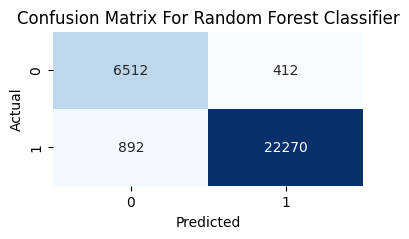

In [501]:
cm = confusion_matrix(y_test_1, y_pred_test_1)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix For Random Forest Classifier")
plt.show()

#### 3.Extree Tree Classifier

In [502]:
from sklearn.ensemble import ExtraTreesClassifier

In [503]:
extratree = ExtraTreesClassifier()

In [504]:
extratree.fit(X_resampled,y_resampled)

ExtraTreesClassifier()

In [505]:
y_pred_train_2= extratree.predict(X_resampled)
y_pred_test_2= extratree.predict(X_test_1)

In [506]:
print(y_pred_train_2)

[1 1 1 ... 0 0 0]


In [507]:
importances = extratree.feature_importances_
print(importances)

[0.11619834 0.07331269 0.15129275 0.01421939 0.0832556  0.10100403
 0.00941193 0.06775093 0.03417906 0.10097773 0.04562773 0.05486
 0.06374592 0.08416391]


In [508]:
probabilities = extratree.predict_proba(X_resampled)
print(probabilities)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [509]:
accuracy_train= accuracy_score(y_resampled, y_pred_train_2)
accuracy_test= accuracy_score(y_test_1, y_pred_test_2)
print("Accuracy_Train: ",accuracy_train)
print("Accuracy_Test: ",accuracy_test)
print(confusion_matrix(y_true= y_test_1, y_pred= y_pred_test_2))
print(classification_report(y_true= y_test_1, y_pred= y_pred_test_2)) 

Accuracy_Train:  1.0
Accuracy_Test:  0.9597487203350396
[[ 6581   343]
 [  868 22294]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      6924
           1       0.98      0.96      0.97     23162

    accuracy                           0.96     30086
   macro avg       0.93      0.96      0.94     30086
weighted avg       0.96      0.96      0.96     30086



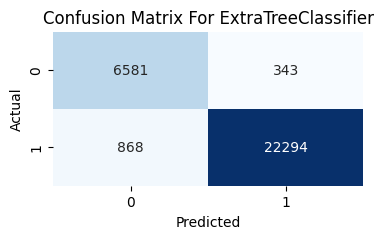

In [510]:
cm = confusion_matrix(y_test_1, y_pred_test_2)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix For ExtraTreeClassifier")
plt.show()

#### 4.Logistic Regression

In [511]:
from sklearn.linear_model import LogisticRegression

In [512]:
X_training_, X_testing_, y_training_, y_testing_ = train_test_split(c, d, test_size=0.2, random_state=42)

In [513]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_training_)
X_test_scaled = scaler.transform(X_testing_)

In [514]:
logreg = LogisticRegression(max_iter=1000)  # You can adjust the max_iter if needed
logreg.fit(X_train_scaled, y_training_)

LogisticRegression(max_iter=1000)

In [515]:
y_pred_training = logreg.predict(X_train_scaled)
y_pred_testing = logreg.predict(X_test_scaled)

In [516]:
accuracy_train = accuracy_score(y_training_, y_pred_training)
accuracy_test = accuracy_score(y_testing_, y_pred_testing)
print(f"Accuracy on Train Data: {accuracy_train:.4f}")
print(f"Accuracy on Test Data: {accuracy_test:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_testing_, y_pred_testing))
print("Classification Report:")
print(classification_report(y_testing_, y_pred_testing))

Accuracy on Train Data: 0.8040
Accuracy on Test Data: 0.8028
Confusion Matrix:
[[ 2313  4611]
 [ 1323 21839]]
Classification Report:
              precision    recall  f1-score   support

        Lost       0.64      0.33      0.44      6924
         Won       0.83      0.94      0.88     23162

    accuracy                           0.80     30086
   macro avg       0.73      0.64      0.66     30086
weighted avg       0.78      0.80      0.78     30086



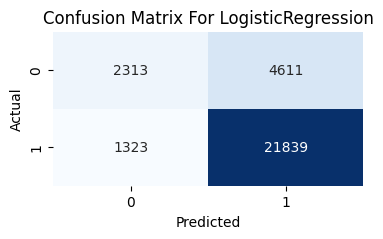

In [517]:
cm = confusion_matrix(y_testing_, y_pred_testing)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix For LogisticRegression")
plt.show()

In [518]:
X_resampled.columns

Index(['country', 'selling_price', 'item_type_encoded', 'order_year',
       'order_month', 'order_day', 'delivery_year', 'delivery_month',
       'delivery_day', 'application', 'width', 'product_ref',
       'thickness_boxcox', 'quantity_tons_boxcox'],
      dtype='object')

In [519]:
X_train_1.head(1)

,country,selling_price,item_type_encoded,order_year,order_month,order_day,delivery_year,delivery_month,delivery_day,application,width,product_ref,thickness_boxcox,quantity_tons_boxcox
57875,26.0,589.0,2,2020.0,10.0,14.0,2020,12,1,15.0,1981.5,640405,1.74335,1.48275


In [520]:
y_train_1.head(1)

57875    Won
Name: status, dtype: category
Categories (2, object): ['Won', 'Lost']

In [521]:
user_data = np.array([[26.0,589.0, 2, 2020.0, 10.0, 14.0, 2020.0, 12, 1, 15, 1981.5, 640405, 1.74335,1.48275]])
y_predict = extratree.predict(user_data)
print("Predicted selling price : ",y_predict[0]) #original is Won predicted is 1-Won

Predicted selling price :  1


C:\Users\nandh\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


In [522]:
X_train_1.tail(1)

,country,selling_price,item_type_encoded,order_year,order_month,order_day,delivery_year,delivery_month,delivery_day,application,width,product_ref,thickness_boxcox,quantity_tons_boxcox
147853,32.0,984.0,5,2021.0,2.0,23.0,2021,7,1,10.0,1250.0,1668701718,0.39955,3.212013


In [523]:
y_train_1.tail(1)

147853    Won
Name: status, dtype: category
Categories (2, object): ['Won', 'Lost']

In [528]:
user_data = np.array([[32.0,984.0, 5, 2021.0, 2.0,23.0, 2021.0, 7, 1, 10.0, 1250.0, 1668701718, 0.39955,3.212013]])
y_predict = extratree.predict(user_data)
print("Predicted selling price : ",y_predict[0]) #original is Won predicted is 1-Won

Predicted selling price :  1


C:\Users\nandh\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


In [525]:
from sklearn.model_selection import cross_val_score

In [526]:
# Initialize classifiers
models = {
    'Random Forest Classifier': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),  # Adjust max_iter for convergence if needed
    'Decision Tree': DecisionTreeClassifier(),
    'ExtraTreeClassifier': ExtraTreesClassifier()
}
# Perform cross-validation for each model
for model_name, model in models.items():
    scores = cross_val_score(model, X_resampled, y_resampled, cv=3)  # 5-fold cross-validation
    print(f"{model_name} - Cross-validation scores: {scores}")
    print(f"{model_name} - Average accuracy: {scores.mean()}\n")

Random Forest Classifier - Cross-validation scores: [0.89181154 0.96673184 0.96615017]
Random Forest Classifier - Average accuracy: 0.9415645149723293

Logistic Regression - Cross-validation scores: [0.54134622 0.57843628 0.53355092]
Logistic Regression - Average accuracy: 0.5511111397660619

Decision Tree - Cross-validation scores: [0.84989983 0.93377066 0.93612965]
Decision Tree - Average accuracy: 0.9066000447031852

ExtraTreeClassifier - Cross-validation scores: [0.91481936 0.96975328 0.96922008]
ExtraTreeClassifier - Average accuracy: 0.9512642397151834



In [529]:
with open(r"D:/CAPSTONE/COPPER/Classification_Model.pkl","wb") as c:
  pickle.dump(extratree,c)
with open(r"D:/CAPSTONE/COPPER/Classification_Model.pkl","rb") as c1:
  class_model=pickle.load(c1)

In [536]:
user_data = np.array([[32.0,984.0, 5, 2021.0, 2.0,23.0, 2021.0, 7, 1, 10.0, 1250.0, 1668701718, 0.39955,3.212013]])
y_predict = class_model.predict(user_data)
print("Predicted selling price : ",y_predict[0]) #original is Won predicted is 1-Won
if y_predict == 1:
    print("Won")
else:
    print("Lost")

Predicted selling price :  1
Won


C:\Users\nandh\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
